In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from math import pi

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [12]:
### Files for the simulations:
#'C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\Modeling angular dimension\\FENS_18\\loop_GEE_distance.ipynb

Df1=pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\Modeling angular dimension\\FENS_18\\GEE_distance_inter_1.csv')
Df2=pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\Modeling angular dimension\\FENS_18\\GEE_distance_inter_3.csv')
Df3=pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\Modeling angular dimension\\FENS_18\\GEE_distance_inter_4.csv')
Df4=pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\Modeling angular dimension\\FENS_18\\GEE_distance_inter_5.csv')
Df5=pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\Modeling angular dimension\\FENS_18\\GEE_distance_inter_6.csv')

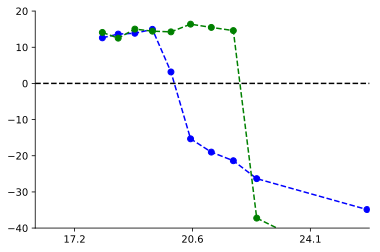

In [19]:
Df_short = pd.concat([Df3, Df5])
Df_long =pd.concat([Df1, Df2])
int_df = Df_long.loc[(Df_long['value']<8) & (Df_long['GEE']!=0.0215)]
Df_tot = pd.concat([Df_short, int_df])

plt.figure()

colors=['b', 'g', 'k']
for idx, Gee_val in enumerate([0.020, 0.023]): #Df.GEE.unique()):
    int_reg = Df_tot.loc[Df_tot['GEE']==Gee_val]
    Gr = int_reg.groupby('value').mean()
    Means = list(Gr['interference'])
    #Means.reverse()
    x = list(int_reg.value.unique())
    x = list(np.sort(x))
    x = [pi/x[i] for i in range(0, len(x))]
    df_plot = pd.DataFrame({'distance':x, 'interf': Means})
    df_plot = df_plot.sort_values('distance')
    x=df_plot.distance 
    y=df_plot.interf
    pfit = np.poly1d(np.polyfit(x, y, 4))
    xp=np.linspace(pi/10, pi/2, 100)
    yp = [pfit(xp[i]) for i in range(0,len(xp))]
    plt.plot(x, y , color=colors[idx], linestyle= '--', marker='o')
    #plt.plot(xp, yp , linestyle= '--', color=colors[idx])
    #plt.ylim(-40, 20)




plt.ylim(-40, 20)
plt.xlim(0.28, 0.45)
plt.axhline(0, color='k', linestyle= '--')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xticks([0.30, 0.36, 0.42],[round(np.degrees(0.30),1), round(np.degrees(0.36),1), round(np.degrees(0.42),1)])
plt.show(block=False)

